# Soduku resolution with Recocido Simulado - Brice de Soras

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import random
from math import exp

We will consider the 3 rules which follow :

1. Each row of cells contains the integers 1 through to n*n exactly once.
2. Each column of cells contains the integers 1 through to n*n exactly once
3. Each n × n square contains the integers 1 through to n*n exactly once.

In [2]:
sudokuInitial = np.array([[0,0,0,0,3,0,6,0,0],
                         [5,0,0,9,0,0,4,0,0],
                         [0,8,0,6,0,7,0,0,9],
                         [0,7,0,0,0,0,8,0,1],
                         [0,5,0,0,8,0,0,2,0],
                         [3,0,8,0,0,0,0,5,0],
                         [1,0,0,8,0,4,0,9,0],
                         [0,0,2,0,0,6,0,0,5],
                         [0,0,9,0,1,0,0,0,0]])

In [3]:
def copySudoku(sudoku):
    sudokuCopy = []
    for i in range(len(sudoku)):
        sudokuCopy.append(list(sudoku[i]))
    return sudokuCopy

In [4]:
## lenth of the sudoku (in our exercice = 16)
sudoLen = len(sudokuInitial)

## lenth of a square of the sudoku (in our exercice 4)
sudoSquareLen = int(sudoLen**(1/2.0))

## In all the following functions we will consider (i,j) the position of a square and (u,v) the position of a number in the grid

## function that returns a square of the sudoku, determined by it's position (i,j)
## example : square(1,1) returns the top left square
def square(sudo,i,j):
    A = [] #  empty regular list
    for t in range(sudoSquareLen):
        X = sudo[(i-1)*sudoSquareLen+t][(j-1)*sudoSquareLen:(j-1)*sudoSquareLen+sudoSquareLen]
        A.append(X)
    return np.array(A)

In [5]:
square(sudokuInitial, 2, 2)

array([[0, 0, 0],
       [0, 8, 0],
       [0, 0, 0]])

In [6]:
## function that puts in a list all the couples (u,v) of the numbers that are not fixed in a square (i,j)
## Returns a list of the coordinates (u,v) of the numbers that have to be found in a square (i,j)
def nonFixedPosition(sudo,i,j):
    A = [] #local positions
    #B = [] #global positions
    sq = square(sudo,i,j)
    for u in range(sudoSquareLen):
        for v in range(sudoSquareLen):
            if(sq[u][v] == 0):
                A.append([u,v])
    return A

In [7]:
nonFixedPosition(sudokuInitial,2,2)

[[0, 0], [0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1], [2, 2]]

In [8]:
## function that returns a random position (u,v) in a square (i,j) amongs all the non fixed numbers of this square
def randomNonFixedNumber(sudo,i,j):
    rd = random.randint(0, len(nonFixedPosition(sudo,i,j)) - 1)
    return nonFixedPosition(sudo,i,j)[rd]

In [9]:
randomNonFixedNumber(sudokuInitial, 2, 2)

[2, 1]

In [10]:
## function that returns the list of all the numbers that are not present in the square (i,j)
def listPossibleNumbers(sudo,i,j):
    A = [] ##list of all the possible numbers
    B = [] ##list of all the non possible numbers
    sq = square(sudo,i,j)
    for u in range(len(sq)):
        for v in range(len(sq)):
            if (sq[u,v] != 0):
                B.append(sq[u,v])
    for t in range(sudoLen):
        if (t+1 not in (B)):
            A.append(t+1)
    return A

In [11]:
listPossibleNumbers(sudokuInitial, 2, 2)

[1, 2, 3, 4, 5, 6, 7, 9]

In [12]:
## function that fills a square (i,j) of the sudoku by putting numbers that respect the 3rd rule
def sudokuFill3rdRule1(sudo, i,j):
    sq = square(sudo, i,j)
    noFixedPos = nonFixedPosition(sudo,i,j)
    for x in range(len(noFixedPos)) :
        sq[noFixedPos[x][0], noFixedPos[x][1]] = listPossibleNumbers(sudokuInitial,i,j)[x]
    return sq

In [13]:
sudokuFill3rdRule1(sudokuInitial, 2, 2)

array([[1, 2, 3],
       [4, 8, 5],
       [6, 7, 9]])

In [14]:
## function that fills the sudoku by putting numbers that respect the 3rd rule
def sudokuFill3rdRule(sudo):
    A = []
    B = []
    for i in range(1, sudoSquareLen + 1):
        for j in range(1, sudoSquareLen + 1):
            A.append(sudokuFill3rdRule1(sudo,i,j))
    for i in range(3):    
        B.append(np.concatenate((A[0][i], A[1][i], A[2][i]), axis=None).tolist())
    for i in range(3):    
        B.append(np.concatenate((A[3][i], A[4][i], A[5][i]), axis=None).tolist())
    for i in range(3):    
        B.append(np.concatenate((A[6][i], A[7][i], A[8][i]), axis=None).tolist())
    return B

In [15]:
## function that fills the sudoku by putting numbers that respect the 3rd rule
def sudokuFill3rdRule_2(sudo):
    A = []
    B = []
    for i in range(1, sudoSquareLen + 1):
        for j in range(1, sudoSquareLen + 1):
            A.append(sudokuFill3rdRule1(sudo,i,j))
            
    for i in range(sudoSquareLen):
        for j in range(sudoSquareLen):    
            B.append(np.concatenate((A[sudoSquareLen*i][j], A[sudoSquareLen*i + 1][i], A[sudoSquareLen*i + 2][j]), axis=None).tolist())
    
    return B

In [16]:
sudokuFilled = sudokuFill3rdRule(sudokuInitial)

In [17]:
sudokuFilled

[[1, 2, 3, 1, 3, 2, 6, 1, 2],
 [5, 4, 6, 9, 4, 5, 4, 3, 5],
 [7, 8, 9, 6, 8, 7, 7, 8, 9],
 [1, 7, 2, 1, 2, 3, 8, 3, 1],
 [4, 5, 6, 4, 8, 5, 4, 2, 6],
 [3, 9, 8, 6, 7, 9, 7, 5, 9],
 [1, 3, 4, 8, 2, 4, 1, 9, 2],
 [5, 6, 2, 3, 5, 6, 3, 4, 5],
 [7, 8, 9, 7, 1, 9, 6, 7, 8]]

In [18]:
sudokuFilled_2 = sudokuFill3rdRule_2(sudokuInitial)

In [19]:
sudokuFilled_2

[[1, 2, 3, 1, 3, 2, 6, 1, 2],
 [5, 4, 6, 1, 3, 2, 4, 3, 5],
 [7, 8, 9, 1, 3, 2, 7, 8, 9],
 [1, 7, 2, 4, 8, 5, 8, 3, 1],
 [4, 5, 6, 4, 8, 5, 4, 2, 6],
 [3, 9, 8, 4, 8, 5, 7, 5, 9],
 [1, 3, 4, 7, 1, 9, 1, 9, 2],
 [5, 6, 2, 7, 1, 9, 3, 4, 5],
 [7, 8, 9, 7, 1, 9, 6, 7, 8]]

In [20]:
## copy for tests
sudokuFilledCopy = sudokuFilled

In [21]:
sudokuFilledCopy

[[1, 2, 3, 1, 3, 2, 6, 1, 2],
 [5, 4, 6, 9, 4, 5, 4, 3, 5],
 [7, 8, 9, 6, 8, 7, 7, 8, 9],
 [1, 7, 2, 1, 2, 3, 8, 3, 1],
 [4, 5, 6, 4, 8, 5, 4, 2, 6],
 [3, 9, 8, 6, 7, 9, 7, 5, 9],
 [1, 3, 4, 8, 2, 4, 1, 9, 2],
 [5, 6, 2, 3, 5, 6, 3, 4, 5],
 [7, 8, 9, 7, 1, 9, 6, 7, 8]]

### At this point normally the sudoku respects the 3rd rule

- function recocido simulado
- the objective here is to take 2 randomly chosen numbers that are not fixed in a square of the sudoku and swap there positions
- a cost per lines/columns is calculated and decreases if less similar numbers are on the same line/column
- a global cost is the sum of all the costs per line/column
- the algorithm should swap the numbers until the global cost is null

In [22]:
## this function calculates the cost of all lines
def costLine(sudo):
    A = []
    for i in range(sudoLen):
        line = sudo[i]
        cost = 0
        for j in range(len(line)):
            if line.count(j+1) == 0:
                cost += 1
        A.append(cost)
    return sum(A)

In [23]:
## this function calculates the cost of all lines
def costColumn(sudo):
    transposesudokuGrid = np.transpose(sudo)
    A = []
    for i in range(sudoLen):
        line = transposesudokuGrid[i]
        cost = 0
        for j in range(len(line)):
            if line.tolist().count(j+1) == 0:
                cost += 1
        A.append(cost)
    return sum(A)

In [24]:
## this function calculates the global cost
def costGlobal(sudo):
    return costColumn(sudo) + costLine(sudo)

In [25]:
sudokuFilledCopy

[[1, 2, 3, 1, 3, 2, 6, 1, 2],
 [5, 4, 6, 9, 4, 5, 4, 3, 5],
 [7, 8, 9, 6, 8, 7, 7, 8, 9],
 [1, 7, 2, 1, 2, 3, 8, 3, 1],
 [4, 5, 6, 4, 8, 5, 4, 2, 6],
 [3, 9, 8, 6, 7, 9, 7, 5, 9],
 [1, 3, 4, 8, 2, 4, 1, 9, 2],
 [5, 6, 2, 3, 5, 6, 3, 4, 5],
 [7, 8, 9, 7, 1, 9, 6, 7, 8]]

In [26]:
## function that return the coordinates (u,v) (0->15) from the square(i,j) (1->4) and position in square (0->3)
def ChangeCoordinates(i,j,u,v):
    return [(i-1)*sudoSquareLen+u , (j-1)*sudoSquareLen+v]

In [27]:
ChangeCoordinates(2,2,0,3)

[3, 6]

In [28]:
def swapRandomCells(sudo):
        
    newSudo = copySudoku(sudo)
    
    # choose a random square and get the non-fixed positions in this square
    rd1 = random.randint(1,sudoSquareLen)
    rd2 = random.randint(1,sudoSquareLen)
    #square = square(sudoku, rd1, rd2)
    A = nonFixedPosition(sudokuInitial, rd1,rd2) ##list of non fixed positions in a random square of the sudoku

    # chose two random cells among the non fixed ones in the random square
    rd3 = random.randint(0,len(A)-1)
    cell_1_coordinates = A[rd3]
    rd4 = random.randint(0,len(A)-1)
    while rd4 == rd3:
        rd4 = random.randint(0,len(A)-1)
    cell_2_coordinates = A[rd4]

    # in the whole sudoku
    coordinates_cell_1 = ChangeCoordinates(rd1, rd2, cell_1_coordinates[0], cell_1_coordinates[1])
    coordinates_cell_2 = ChangeCoordinates(rd1, rd2, cell_2_coordinates[0], cell_2_coordinates[1])
    
    # swap
    tmp = newSudo[coordinates_cell_1[0]][coordinates_cell_1[1]]
    newSudo[coordinates_cell_1[0]][coordinates_cell_1[1]] = newSudo[coordinates_cell_2[0]][coordinates_cell_2[1]]
    newSudo[coordinates_cell_2[0]][coordinates_cell_2[1]] = tmp

    return newSudo

In [42]:
def recocidoSimulado(sudo):
        
    sudoCopy = copySudoku(sudo)
        
    costs = []
    
    temp = 150
    
    changeProbs = []
    
    compteur = 0
    while temp > 1 :
        
        changeProb = 0
        
        param = 500
        for i in range(param) :
            
            if costGlobal(sudoCopy) == 0:
                print("Sudoku solved")
                plt.plot(np.arange(len(costs)), costs)
                plt.show()
                print("Final cost : " + str(costGlobal(sudoCopy)))
                print("Temperature changed " + str(compteur) + " times")
                return sudoCopy
                
            sudoAfter = swapRandomCells(sudoCopy)

            delta = costGlobal(sudoAfter) - costGlobal(sudoCopy)
            
            if (delta <= 0):
                sudoCopy = sudoAfter
            else :
                uniformValue = random.uniform(0, 1)
                if (uniformValue <= exp(-30*delta/temp)):
                    changeProb += 1
                    sudoCopy = sudoAfter

            
            costs.append(costGlobal(sudoCopy))
        changeProbs.append(changeProb)
        compteur += 1
        temp = 0.9 * temp
    
    plt.plot(np.arange(len(costs)), costs)
    plt.show()
    
    percents = list(map(lambda x: float(x)/param * 100, changeProbs))
    plt.plot(np.arange(len(percents)), percents)
    plt.show()
    
    print("Final cost : " + str(costGlobal(sudoCopy)))
    print("Temperature changed " + str(compteur) + " times")
    return sudoCopy

Sudoku solved


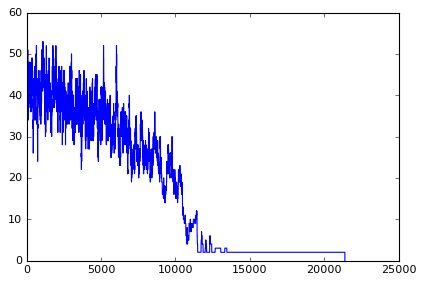

Final cost : 0
Temperature changed 42 times


In [43]:
solution = recocidoSimulado(sudokuFilled)

### Let's see the solution

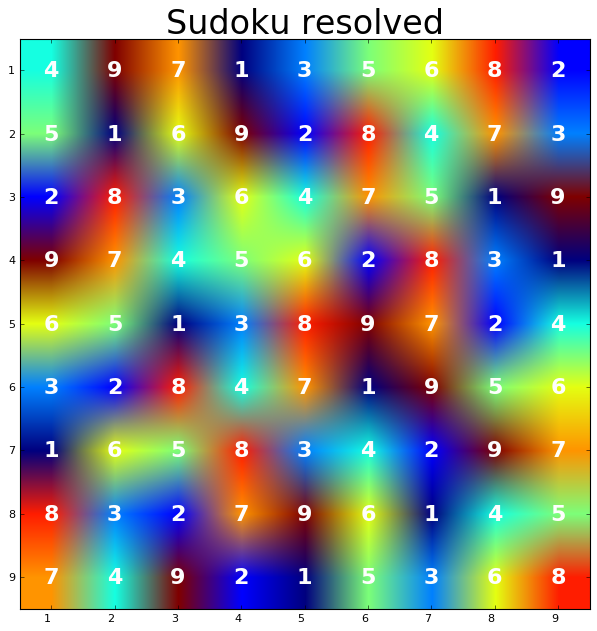

In [39]:
lines = np.arange(1,10)
columns = np.arange(1,10)

fig, ax = plt.subplots(figsize=(15,8))
im = ax.imshow(solution)

# We want to show all ticks...
ax.set_xticks(np.arange(len(lines)))
ax.set_yticks(np.arange(len(columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(lines)
ax.set_yticklabels(columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(lines)):
    for j in range(len(columns)):
        text = ax.text(j, i, solution[i][j],
                       ha="center", va="center", color="w", weight="bold", fontsize=20)

ax.set_title("Sudoku resolved", fontsize=30)
fig.tight_layout()
plt.show()

In [44]:
for i in range(sudoLen):
    line = solution[i]
    for j in range(sudoLen):
        if line.count(j+1) == 0:
            print("Line " + str(i+1) + " : missing : " + str(j+1))
        

In [45]:
for i in range(sudoLen):
    column = np.transpose(solution)[i]
    for j in range(sudoLen):
        if column.tolist().count(j+1) == 0:
            print("Column " + str(i+1) + " : missing : " + str(j+1))